In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import itertools
# import NOTEARS
import nt_linear as nt
from dag_generator import DAGGenerator
from sklearn.preprocessing import scale
import scipy
from scipy.stats import entropy
from matplotlib import animation
import seaborn as sns
import matplotlib as mpl
from cdt.metrics import SHD

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

# Manipulations
This notebook contains all possible manipulations on 3-node variable systems using varsortability. 

## ToC
1. Chains
    - Revert Chain
    - Introduce Fork
    - Introduce Collider
2. Forks
    - Convert Fork to Chain
    - Change Fork's origin
    - Introduce Collider
3. Colliders
    - Convert Collider into Fork
    - Convert Collider into Chain
    - Change Collider's sink node

In [3]:
SAMPLE_SIZE = 100000
NODE_SIZE = 2000
ARROW_SIZE = 20
LINEWIDTH = 1

## 1. Chains

### Revert Chain

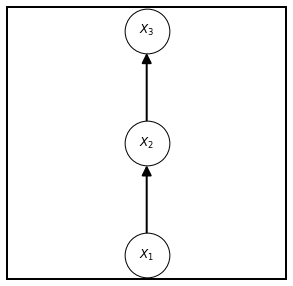

In [4]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
fig = plt.figure(figsize=(5, 5))
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

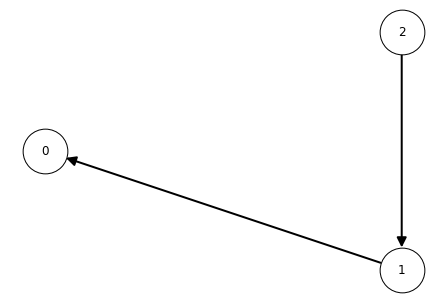

In [11]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T

gdata = scale(gdata)

gdata[:, 0] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Create Fork

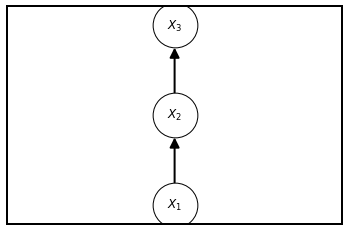

In [12]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

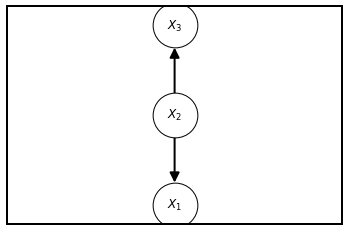

In [17]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(nt_pred_nx, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

### Creating Collider

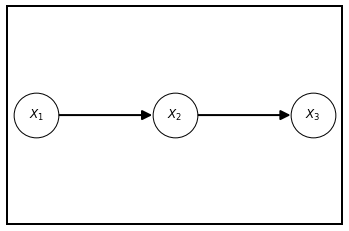

In [4]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (node, 1) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

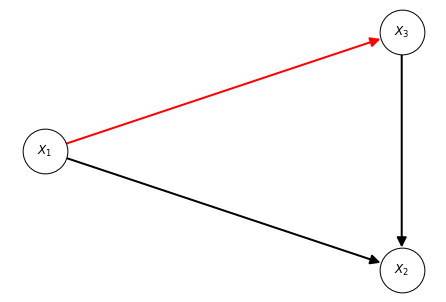

In [9]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
#gdata = scale(gdata)

gdata[:, 1] *= 4

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
edge_colors = ['black' if edge != (0, 2) else 'red' for edge in nt_pred_nx.edges]
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, edge_color=edge_colors)

In [10]:
lhs = -(np.cov(gdata[:, 2], gdata[:, 1])[0, 1]**2 / np.var(gdata[:, 2])) \
        - 2*(np.cov(gdata[:, 0], gdata[:, 1])[0, 1] / np.var(gdata[:, 0])*np.cov(gdata[:, 1], gdata[:, 2])[0, 1] / np.var(gdata[:, 2])*np.cov(gdata[:, 0], gdata[:, 2])[0, 1]) \
        - (np.cov(gdata[:, 0], gdata[:, 2])[0, 1]**2 / np.var(gdata[:, 0]))
rhs = -np.cov(gdata[:, 1], gdata[:, 2])[0, 1]**2 / np.var(gdata[:, 1])
print(f"lhs = {lhs} < {rhs} = rhs")

lhs = -43.87632302420148 < -1.9990528166486774 = rhs


## 2. Forks

### Fork2Chain

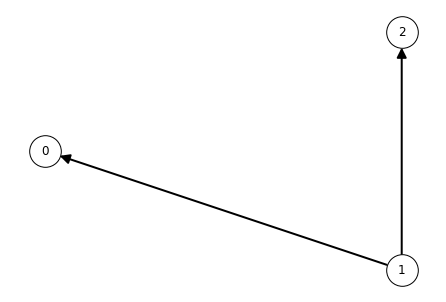

In [31]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

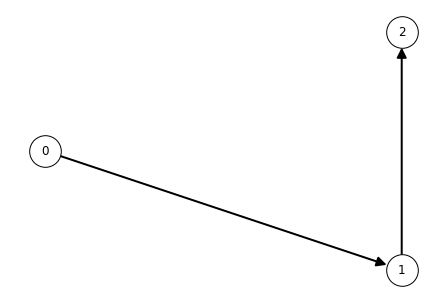

In [32]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Change Fork origin

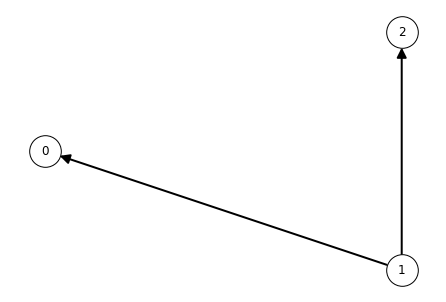

In [33]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

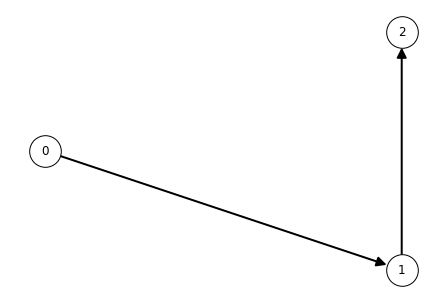

In [34]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2
gdata[:, 2] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Fork2Collider

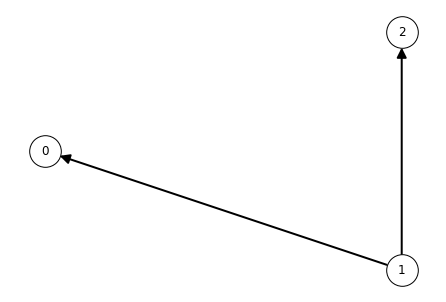

In [35]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

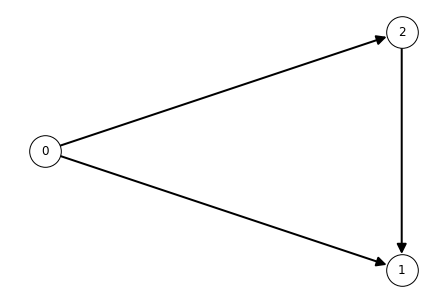

In [36]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

## Colliders

### Collider2Chain

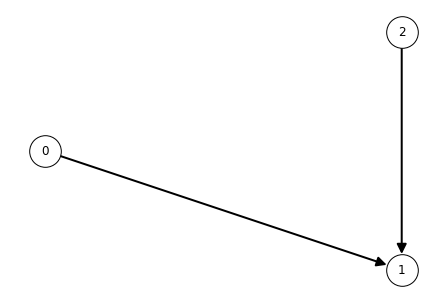

In [3]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

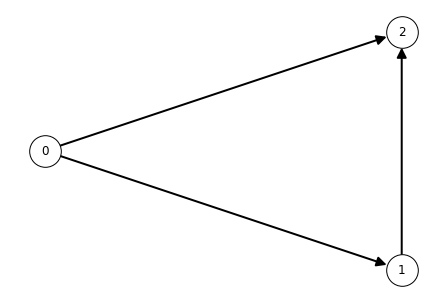

In [7]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Collider2Fork

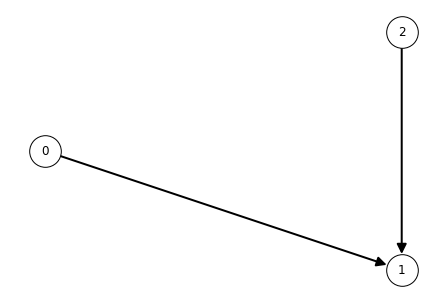

In [39]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

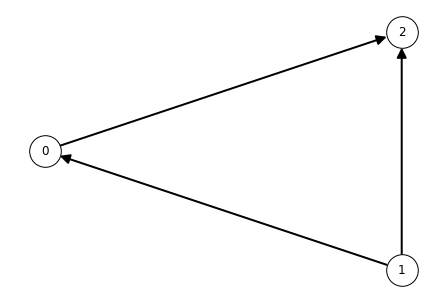

In [40]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Change Collider sink node

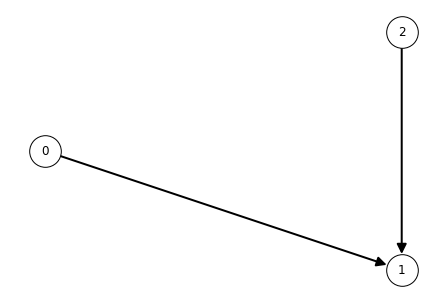

In [41]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

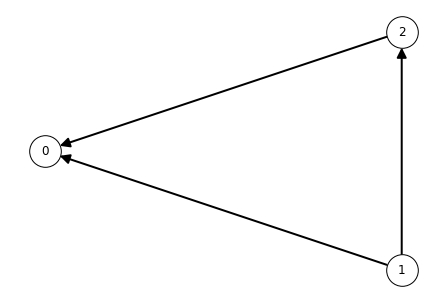

In [42]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

## Attacking SNT and DAG-GNN on Sachs Dataset

## Attack params
### Collider DAG-GNN at $X_6$
$X_5$ -> 0.5

$X_6$ -> 2

$X_7$ -> 0.2

### Fork at $X_6$
$X_5$ -> 4

$X_6$ -> 0.5

$X_7$ -> 2

### Chain flip $X_6$
$X_5$ -> 4

$X_6$ -> 0.5

$X_7$ -> 0.2

### Chain $X_2$
$X_2$ -> 10

$X_{10}$ -> 2

$X_7$ -> 0.01

### Collider $X_2$
$X_2$ -> 10

$X_{10}$ -> 0.5

$X_7$ -> 0.01

In [6]:
df = pd.read_csv('./data/real-world/sachs.data.txt', sep='\t')
df.var()

Raf       1750.965664
Mek        753.435220
Plcg       215.293647
PIP2      8744.902945
PIP3      1169.737437
Erk       8080.542215
Akt      16042.829848
PKA     183012.754944
PKC        134.373176
P38        377.210447
Jnk       1857.027108
dtype: float64

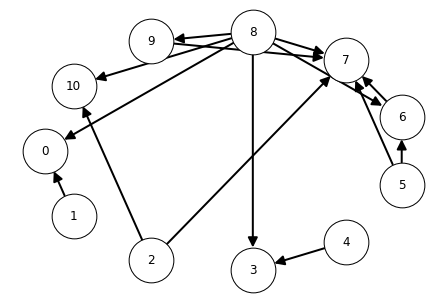

In [42]:
adj = np.loadtxt('./logs/sachs-attacks-dag-gnn/ground_truth')
adj[abs(adj) < 0.3] = 0
adj[abs(adj) >= 0.3] = 1
adj_nx = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [36]:
np.savetxt('attack_2_7_10_collider', adj)

## SNT

In [45]:
df = pd.read_csv('./data/real-world/sachs.data.txt', sep='\t')
df_nt = df.copy()
for c in df_nt.columns:
    df.loc[:, c] = np.log(df[c])
df_nt = df_nt.to_numpy()
# chain flip
#df_nt[:, 5] *= 5
#df_nt[:, 6] *= 1.5
#df_nt[:, 7] *= 0.01

# fork
#df_nt[:, 5] *= 5
#df_nt[:, 6] *= 0.5
#df_nt[:, 7] *= 1.1

# collider
#df_nt[:, 5] *= 1.5
#df_nt[:, 6] *= 5
#df_nt[:, 7] *= 0.01

# chain flip
#df_nt[:, 8] *= 1.1
#df_nt[:, 9] *= 0.3
#df_nt[:, 10] *= 0.1

# fork
#df_nt[:, 8] *= 3
#df_nt[:, 9] *= 0.3
#df_nt[:, 10] *= 1.1

# collider
df_nt[:, 8] *= 1.1
df_nt[:, 9] *= 3
df_nt[:, 10] *= 0.1

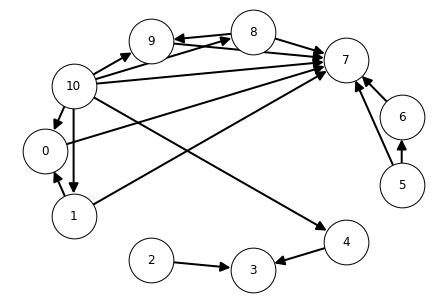

In [46]:
nt_pred = nt.notears_linear(df_nt, 0.05, 'l2')
nt_pred[nt_pred != 0] = 1
adj_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [47]:
np.savetxt('attack_8_9_10_collider', nt_pred)

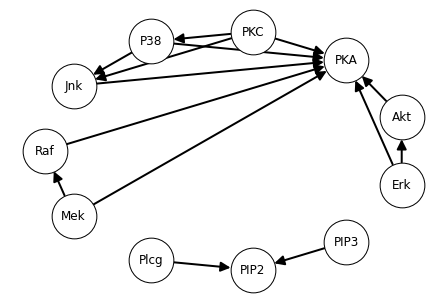

In [95]:
gt = np.loadtxt('./logs/sachs-attack-nt/ground_truth')
pred = np.loadtxt('./logs/sachs-attack-nt/attack_8_9_10_collider')
gt_df = pd.DataFrame(gt, columns=list(df.columns), index=list(df.columns))
exp_adj = gt_df.copy()
#exp_adj.iloc[8, 9] = 0
#exp_adj.iloc[9, 8] = 1
exp_adj.iloc[9, 10] = 0
exp_adj.iloc[10, 9] = 1
#exp_adj.iloc[8, 10] = 0
#exp_adj.iloc[10, 8] = 1
adj_nx = nx.convert_matrix.from_pandas_adjacency(gt_df, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [96]:
SHD(exp_adj.to_numpy(), pred)

5.0

In [97]:
SHD(gt, pred)

7.0

In [4]:
import os

attack_2_7_10_collider
attack_5_6_7_chain
attack_2_7_10_chain
attack_5_6_7_collider
ground_truth
attack_5_6_7_fork


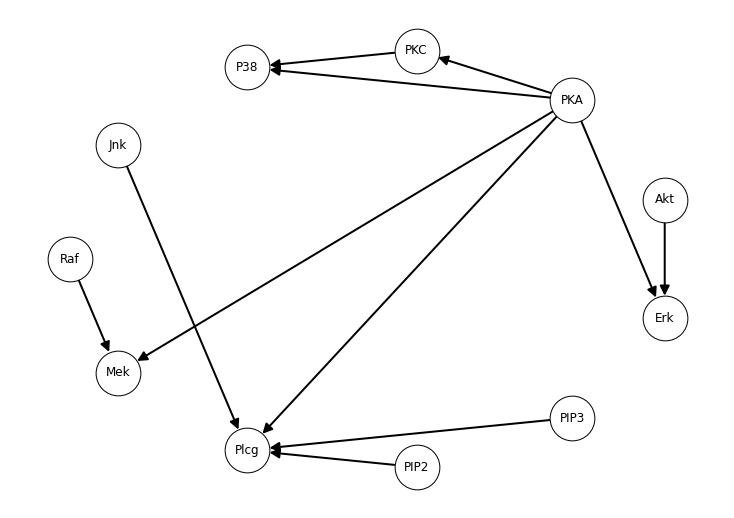

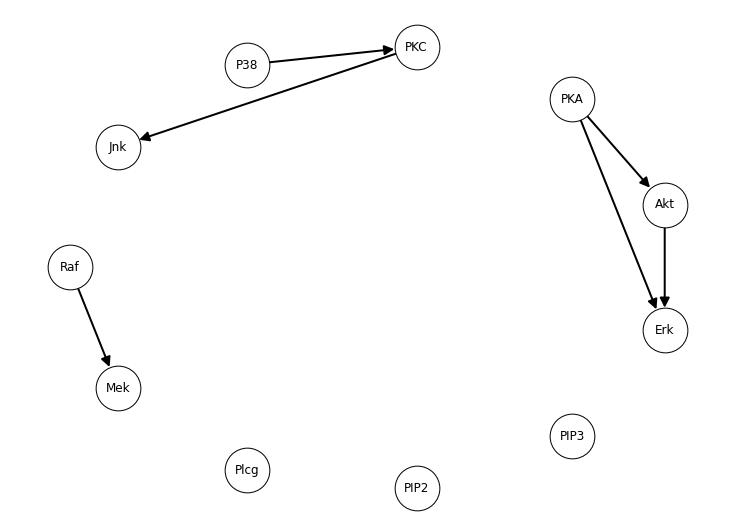

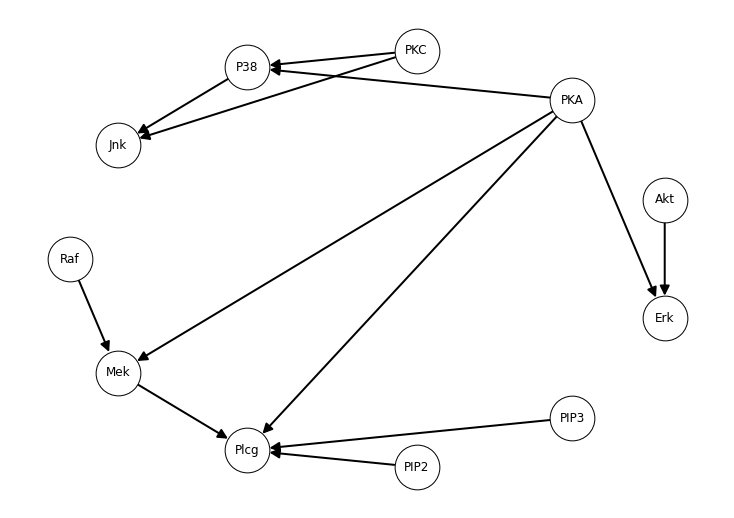

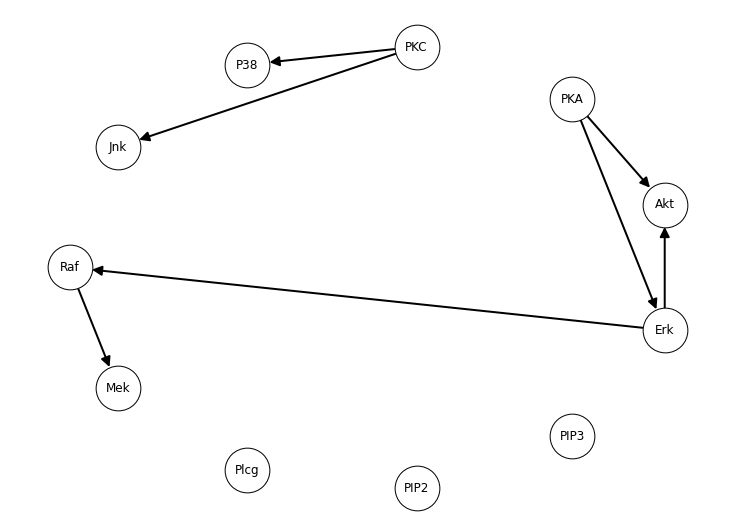

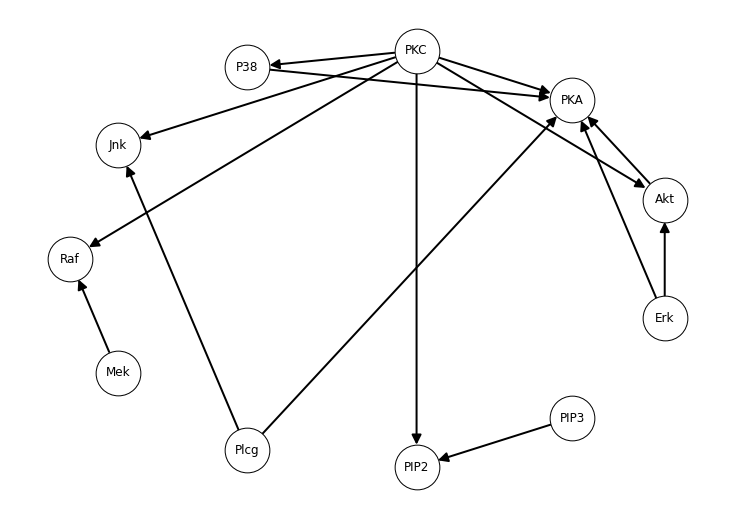

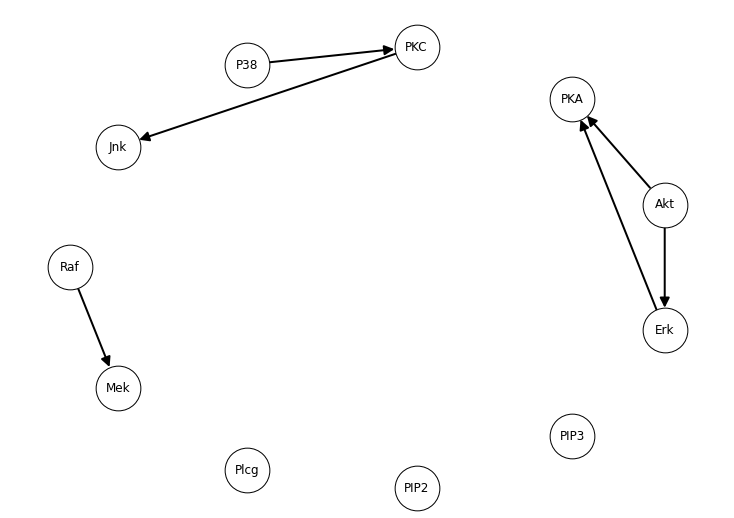

In [17]:
for filename in os.listdir('./logs/sachs-attacks-dag-gnn/'):
    adj = np.loadtxt(f'./logs/sachs-attacks-dag-gnn/{filename}')
    adj = pd.DataFrame(adj, columns=df.columns, index=df.columns)
    adj_nx = nx.convert_matrix.from_pandas_adjacency(adj, create_using=nx.DiGraph)
    fig = plt.figure(figsize=(10, 7))
    print(filename)
    nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')
    plt.savefig(f'./figures/daggnn-predictions-sachs/{filename}.svg')